# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
import tensorflow as tf
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error, 
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys

lib_path = os.path.abspath('../../../lib')
sys.path.append(lib_path)

from easy_keras import KerasMLPRegressor

In [3]:
seed = 12345

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 2. Read Data

In [4]:
data = pd.read_csv('../house_price_dataset.csv')

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.drop(['Id'], axis=1, inplace=True)

data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 3.1.2. Remove Missing Values

In [7]:
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [8]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [9]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### 3.2.2. Remove Outliers

In [10]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [11]:
target_name = 'SalePrice'
feature_name = list(data.columns.drop(target_name))

In [12]:
X = data[feature_name]
y = data[target_name]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 5. Data Preparation

In [14]:
numerical_feature = list(X_train.select_dtypes(include=np.number).columns)
categorical_feature = [f for f in feature_name if f not in numerical_feature]

In [15]:
print('numerical_feature :', numerical_feature, end='\n\n')
print('categorical feature :', categorical_feature)

numerical_feature : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

categorical feature : ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'Gara

In [16]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

MSZoning : ['C (all)' 'FV' 'RH' 'RL' 'RM']
Street : ['Grvl' 'Pave']
LotShape : ['IR1' 'IR2' 'IR3' 'Reg']
LandContour : ['Bnk' 'HLS' 'Low' 'Lvl']
Utilities : ['AllPub']
LotConfig : ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1 : ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2 : ['Artery' 'Feedr' 'Norm' 'PosA' 'RRNn']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle : ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle : ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard']
RoofMatl : ['ClyTile' 'CompShg' 'Membran' 'Roll' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st : ['AsbShng' 'BrkComm' 'BrkFace' 'CemntBd' 'HdBoard' 'ImStucc' '

In [17]:
ordinal_feature = []
nominal_feature = list(categorical_feature)

## ### 5.1. Ordinal Encoding

## 5.2. One Hot Encoding

### 5.2.1. Traning Set

In [18]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [20]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [21]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

In [22]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
119,60,65.0,8461,6,5,2005,2006,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,120,32.0,4500,6,5,1998,1998,443.0,1201,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
966,50,130.0,9600,5,7,1940,1950,0.0,428,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
596,70,60.0,3600,6,7,1910,1993,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1162,20,109.0,8724,5,5,1968,1968,0.0,492,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,30,71.0,6900,5,6,1940,1955,0.0,403,125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1199,20,75.0,11235,4,5,1963,1979,51.0,547,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
570,90,74.0,13101,5,5,1965,1965,108.0,231,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 5.3. Feature Scaling

### 5.3.1. Training Set

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [24]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [25]:
reg = KerasMLPRegressor(
    input_dim=X_train_scaled.shape[1],
    hidden_layer_sizes=(5, 5),
    activation_function='relu',
    learning_rate_init=0.1,
    epochs=1000,
    validation_split=0.1,
    use_gpu=True,
    l1_lambda=0.0,
    l2_lambda=1,
    dropout_rate=[0, 0],
    solver='adam',
    batch_size=64
)

## 6.2. Train Model

In [26]:
reg.fit(X_train_scaled, y_train)

Training:   0%|           0/1000 ETA: ?s,  ?epochs/s

{'loss': [42088378368.0,
  41730863104.0,
  39545303040.0,
  32415631360.0,
  19308283904.0,
  9038498816.0,
  6558233088.0,
  4545496576.0,
  3575552512.0,
  2951312640.0,
  2584355840.0,
  2268345600.0,
  2062523520.0,
  1887833856.0,
  1714786560.0,
  1578718464.0,
  1460252032.0,
  1359160960.0,
  1264658560.0,
  1186575360.0,
  1112968704.0,
  1047912448.0,
  998850816.0,
  939949952.0,
  894830016.0,
  848000704.0,
  810949312.0,
  783426752.0,
  749964928.0,
  730901760.0,
  718796992.0,
  686308480.0,
  665750976.0,
  650921216.0,
  631936768.0,
  619463040.0,
  611196672.0,
  602099072.0,
  586282624.0,
  581087744.0,
  567853440.0,
  555046656.0,
  547152960.0,
  543045952.0,
  535355680.0,
  528858688.0,
  518978784.0,
  511722336.0,
  502109600.0,
  497103104.0,
  515744256.0,
  499728000.0,
  482708992.0,
  476654688.0,
  466572064.0,
  469487712.0,
  455600928.0,
  467350592.0,
  456634784.0,
  441431872.0,
  440385888.0,
  438101952.0,
  432684320.0,
  425608608.0,
  426

## 6.3. Loss Curve

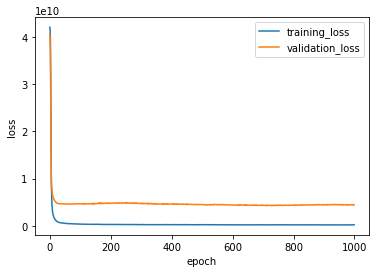

In [27]:
plt.plot(reg.loss_curve_, label='training_loss')
plt.plot(reg.val_loss_curve_, label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

# 6.4. Model's Weight & Bias

In [28]:
for coef in reg.coefs_:
    print(coef.shape)

(254, 5)
(5, 5)
(5, 1)


In [29]:
for intercept in reg.intercepts_:
    print(intercept.shape)

(5,)
(5,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [30]:
y_pred_train = reg.predict(X_train_scaled)

## 7.2. Test Set

In [31]:
y_pred_test = reg.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [32]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percetage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9118708995800204
mean_squared_error =		 622950950.8965786
mean_absolute_error =		 12017.156504185268
mean_absolute_percetage_error = 0.06455928448960403


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

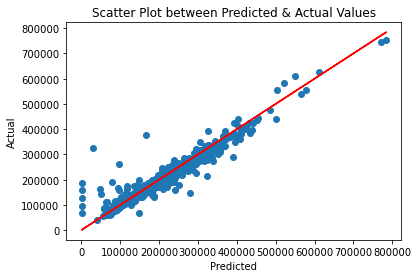

In [33]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [34]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percetage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.5094899510859086
mean_squared_error =		 3078456674.510062
mean_absolute_error =		 35737.1587950824
mean_absolute_percetage_error = 0.2149785877527562


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

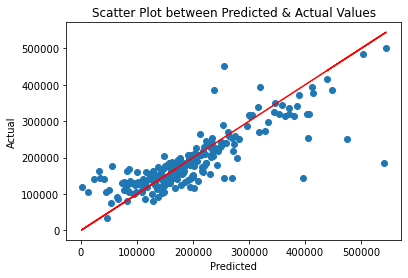

In [35]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [36]:
reg.save_model('house_price_model')

INFO:tensorflow:Assets written to: house_price_model/assets


In [37]:
import pickle

In [38]:
pickle.dump((one_hot_encoder, 
             scaler, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('house_price_env.pickle', 'wb'))